# 图像白平衡

彩色相机内部有三个CCD电子耦合元件，分别用来感受红绿蓝三中颜色的光线，默认情况下，三个颜色的感光电路信号的放大比例是1:1:1的。在理想的拍摄环境下，纯白色的RGB分量按照1:1:1的比例放大之后，得到的是没有偏色的白色，当在非理想的环境光条件下，白色成像出来的效果会偏向环境光的颜色，而不是纯白色。

相机的自动白平衡就是要通过改变RGB感光电路信号的放大比例，让受环境光影响的白色还原成纯白色，保证在各种光线条件下，成像色彩跟物体真实的色彩保持一致。

常用的一种自动白平衡算法是灰度世界法，它假设对于一副色彩丰富的图像，图像上RGB三个分量的平均值趋于同一个灰度值，一般取这个灰度值的大小为RGB三分量的平均值。

In [1]:
#coding:utf-8
import numpy as np
%matplotlib  inline
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
from scipy.misc import imread, imresize, imsave

In [2]:
src = cv2.cvtColor(cv2.imread('../datas/road.jpg'),cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(src,cv2.COLOR_RGB2GRAY)

In [14]:
def white_blance(src):
    rgb = src.astype(np.float32)
    r = rgb[:,:,0]
    g = rgb[:,:,1]
    b = rgb[:,:,2]
    
    mean_r,mean_g,mean_b = np.mean(r),np.mean(g),np.mean(b)
    
    eps = 1.0e-6
    # 调整RGB分量增益
    sum_rgb = mean_r + mean_g + mean_b
    kr = sum_rgb / (3 * mean_r + eps)
    kg = sum_rgb / (3 * mean_g + eps)
    kb = sum_rgb / (3 * mean_b + eps)
    
    dst = np.zeros_like(rgb)
    dst[:,:,0] = r * kr
    dst[:,:,1] = g * kg
    dst[:,:,2] = b * kb
    dst[dst > 255] = 255
    dst = cv2.convertScaleAbs(dst)
    return dst
    
    

In [15]:
dst = white_blance(src)

Text(0.5,1,'White Balance')

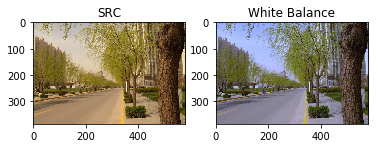

In [13]:
plt.subplot(121)
plt.imshow(src)
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst)
plt.title('White Balance')

参考：

[1].https://blog.csdn.net/dcrmg/article/details/53545510